**IMPORTING LIBRARIES**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


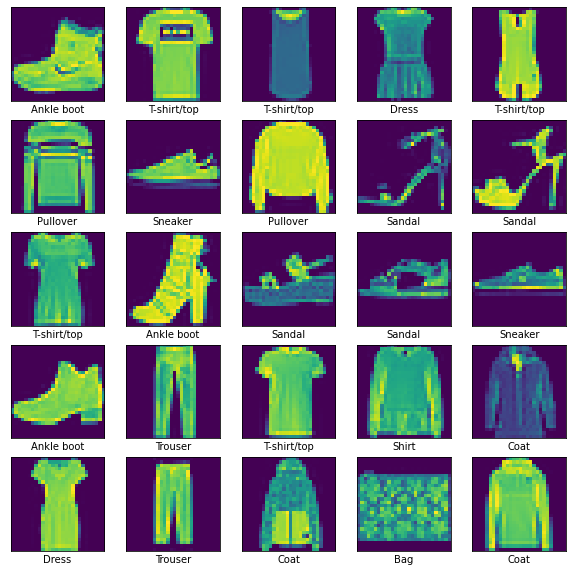

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels_oh = to_categorical(train_labels)
test_labels_oh = to_categorical(test_labels)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels_oh, epochs=10, 
                    validation_data=(test_images, test_labels_oh))


Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4393 - accuracy: 0.8458 - val_loss: 0.3413 - val_accuracy: 0.8836
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2981 - accuracy: 0.8936 - val_loss: 0.2976 - val_accuracy: 0.8954
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2565 - accuracy: 0.9087 - val_loss: 0.2859 - val_accuracy: 0.8954
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2315 - accuracy: 0.9178 - val_loss: 0.2733 - val_accuracy: 0.9022
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2103 - accuracy: 0.9245 - val_loss: 0.2738 - val_accuracy: 0.9054
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1934 - accuracy: 0.9292 - val_loss: 0.2621 - val_accuracy: 0.9069
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1758 - accuracy: 0.9345 - val_loss: 0.2694 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

**MODEL EVALUATION**

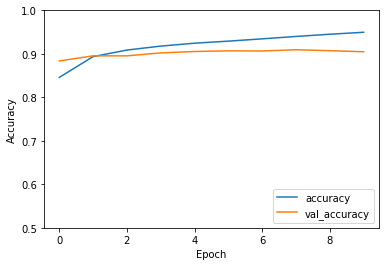

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_oh, verbose=2)

313/313 - 2s - loss: 0.2891 - accuracy: 0.9048 - 2s/epoch - 7ms/step


Here we have fitted the model with around 91% of accuracy which is well acceptable

**TESTING THE MODEL**

([], <a list of 0 Text major ticklabel objects>)

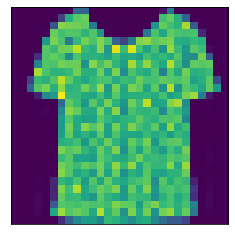

In [ ]:
plt.imshow(test_images[1000])
plt.xticks([])
plt.yticks([])


In [ ]:
print(test_labels[1000])

0


In [ ]:
class_names[0]

'T-shirt/top'

([], <a list of 0 Text major ticklabel objects>)

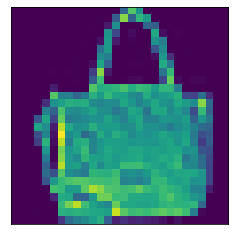

In [ ]:
plt.imshow(test_images[2000])
plt.xticks([])
plt.yticks([])


In [ ]:
print(test_labels[2000])

8


In [ ]:
class_names[8]

'Bag'

([], <a list of 0 Text major ticklabel objects>)

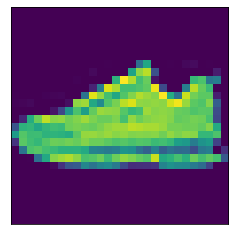

In [ ]:
plt.imshow(test_images[8000])
plt.xticks([])
plt.yticks([])

In [ ]:
test_images[8000].shape

(28, 28)

In [ ]:
print(test_labels[8000])

7


In [ ]:
class_names[7]

'Sneaker'

We can see that in all the three cases the model has predicted the images correctly